# Analisis de Datos

## Analisis de Sesiones Temporales(t x d)

### Cargar Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file ='./data/resultados.csv'
data = pd.read_csv(file)
data.head()

,customer_tag,year,week,profile_id,size,d0,d1,d2,d3,d4,d5,d6,individual_cluster,collective_cluster
0,+++g8j9k+5A=,2016,27,0,1,0,0,0,1,0,0,0,0,12
1,++/oQ9Lb9dI=,2017,22,0,1,1,0,0,0,0,0,0,0,14
2,++14g8obpj0=,2016,36,0,1,0,0,0,1,0,0,0,0,0
3,++14g8obpj0=,2016,35,1,2,0,2,0,0,0,0,0,0,0
4,++14g8obpj0=,2016,31,2,1,1,0,0,0,0,0,0,0,0


### Graficos

### Comportamiento de los clusters en el tiempo

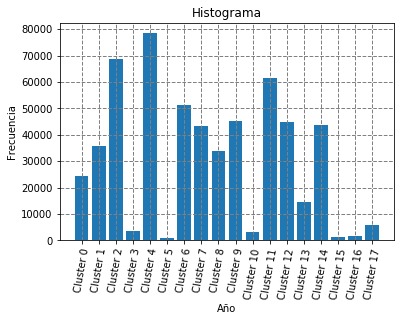

In [2]:
fig, ax = plt.subplots()
hist = data.groupby(['collective_cluster'], as_index=False, sort=True)['customer_tag'].count()
longitud = len(hist)
ax.bar(hist.index, hist['customer_tag'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Año')
ax.set_xticks(hist.index)

ax.set_ylabel('Frecuencia')
tag =[]
for i in range(len(hist)):
    temp = 'Cluster '+ str(i)+''
    tag.append(temp)
    
ax.set_xticklabels(tag, rotation=80)
ax.set_title('Histograma')
plt.show()

### Centroides cluster colectivos

In [3]:
file ='./data/U.json.collective_footprint.clusters'
collective_cluster = pd.read_csv(file, sep=";", header=0)
collective_cluster = collective_cluster.iloc[:, 1:8]
num_cluster_c= len(collective_cluster)
collective_cluster

,d0,d1,d2,d3,d4,d5,d6
0,0.550008,0.409976,0.072678,0.050468,0.035233,0.113480,0.062891
1,0.138317,0.055513,0.016268,0.151340,0.513377,0.286678,0.029189
2,0.014501,0.010181,0.022727,0.017560,0.010679,0.042393,0.990385
3,0.174429,0.166193,2.031811,0.397894,0.322651,0.238178,0.071903
4,0.024353,0.039630,0.020919,0.024180,0.027754,1.140177,0.027574
5,0.000000,0.000000,0.000000,0.285714,0.142857,0.000000,5.348657
6,0.030266,0.027424,0.014170,0.014190,1.070057,0.009797,0.026740
7,0.077665,0.127148,0.110274,0.483051,0.030998,0.131869,0.127429
8,0.001467,0.009069,1.019575,0.000000,0.000000,0.000000,0.000000
9,0.014709,1.086137,0.037763,0.019654,0.013350,0.018572,0.018606


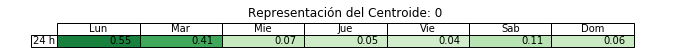

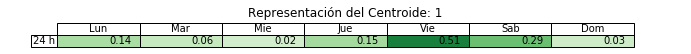

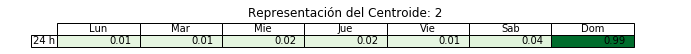

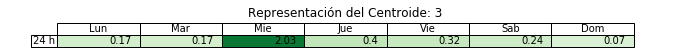

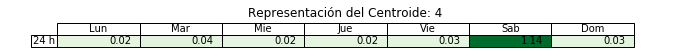

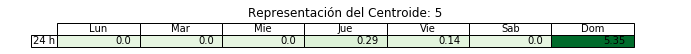

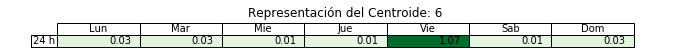

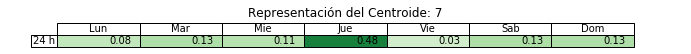

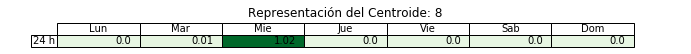

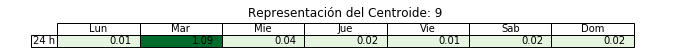

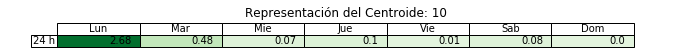

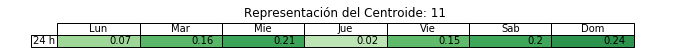

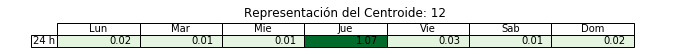

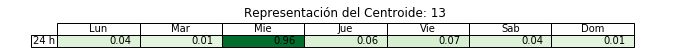

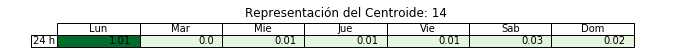

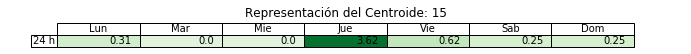

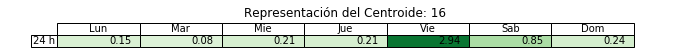

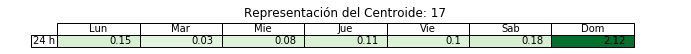

In [4]:
for kk in range(num_cluster_c):
    cluster_i = collective_cluster[collective_cluster.index == kk]
    cluster_i = collective_cluster.iloc[[kk]]
    df0 = cluster_i.iloc[:, 0:7] 

    df0 = df0.transpose().reset_index(drop=True).transpose()

    dfs = [df0]
    df = pd.concat( dfs,axis=0,ignore_index=True)
    df.columns = ['Lun','Mar', 'Mie','Jue','Vie','Sab','Dom']
    df.index = ['24 h']
    
    m = np.around(df.values,2)
    vals = np.around(df.values/(cluster_i.values).mean(),2)
    normal = plt.Normalize(vals.min()-1, vals.max()+1)

    fig = plt.figure(figsize=(12,0.1))
    
    ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])
    ax.set_title('Representación del Centroide: %s'%(kk))
    the_table=plt.table(cellText=m, rowLabels=df.index, colLabels=df.columns, 
                        colWidths = [0.123]*vals.shape[1], loc='upper center', 
                        cellColours=plt.cm.Greens(normal(vals)))

### Acumulacion por Cluster

In [5]:
cluster = data.groupby(['collective_cluster']).sum()
cluster = cluster.iloc[:, 4:-1]
num_cluster= len(cluster)

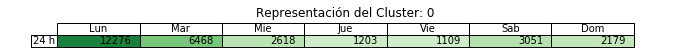

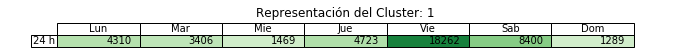

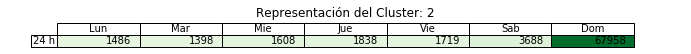

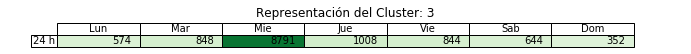

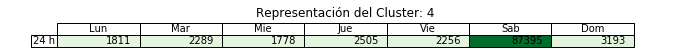

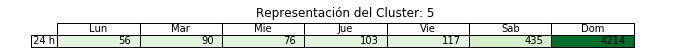

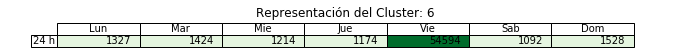

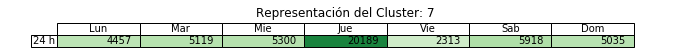

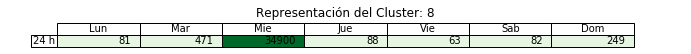

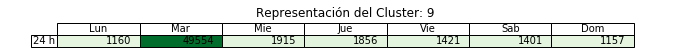

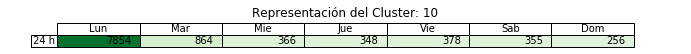

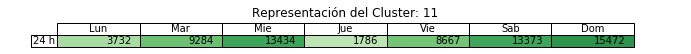

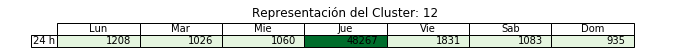

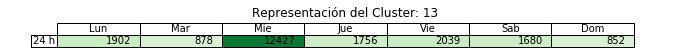

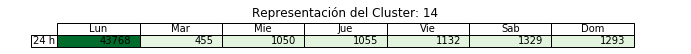

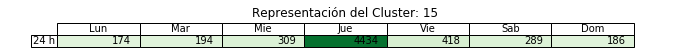

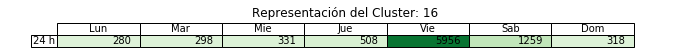

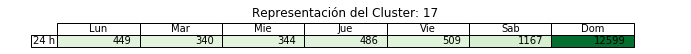

In [6]:
for kk in range(num_cluster):
    cluster_i = cluster[cluster.index == kk]
    df0 = cluster_i.iloc[:, 0:7] 

    df0 = df0.transpose().reset_index(drop=True).transpose()

    dfs = [df0]
    df = pd.concat( dfs,axis=0,ignore_index=True)
    df.columns = ['Lun','Mar', 'Mie','Jue','Vie','Sab','Dom']
    df.index = ['24 h']
    
    m = np.around(df.values,2)
    vals = np.around(df.values/(cluster_i.values).mean(),2)
    normal = plt.Normalize(vals.min()-1, vals.max()+1)

    fig = plt.figure(figsize=(12,0.1))
    
    ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])
    ax.set_title('Representación del Cluster: %s'%(kk))
    the_table=plt.table(cellText=m, rowLabels=df.index, colLabels=df.columns, 
                        colWidths = [0.123]*vals.shape[1], loc='upper center', 
                        cellColours=plt.cm.Greens(normal(vals)))

### Comportamiento de los clusters en el tiempo

In [7]:
helper = data.groupby(['year','week','collective_cluster'], as_index=False, sort=True)['customer_tag'].count()
helper['fecha'] = helper['year'].astype(str).str.cat(helper['week'].astype(str), sep='-')
helper = helper[['fecha','collective_cluster','customer_tag']]
# helper.head(5)

No handles with labels found to put in legend.


Text(0,0.5,'Cantidad')

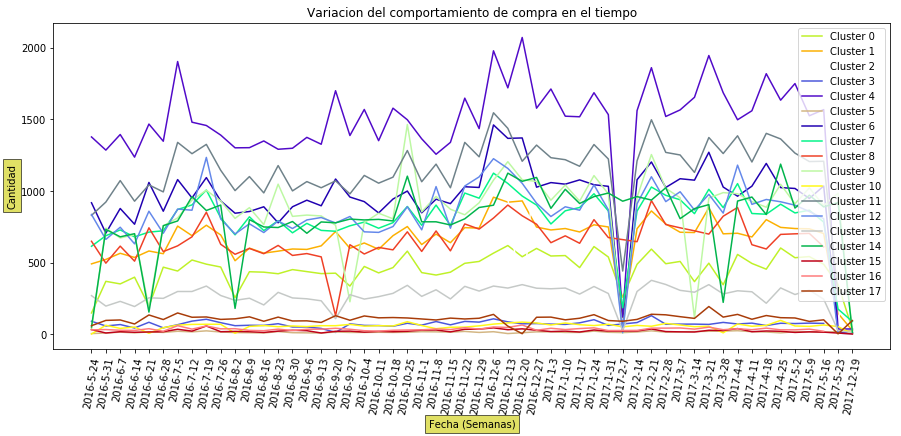

In [8]:
from datetime import datetime
def fromisocalendar(y,w,d):
    date = datetime.strptime( "%04dW%02d-%d"%(y,w-1,d), "%YW%W-%w")
    aa = date.year
    mm = date.month
    dd = date.day
    return str(aa)+"-"+str(mm)+"-"+str(dd) 
                                        
import matplotlib._color_data as mcd
box = dict(facecolor='#cccc00', pad=4, alpha=0.6)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, frameon=True)
x = list(helper['fecha'].drop_duplicates())
for j in range(len(x)):
        x[j] = fromisocalendar(int(x[j][:4]),int(x[j][5:len(x[j])]),2)
ax.set_xticklabels(x, rotation=80)

# ------------ COLORES ---------------------
overlap = mcd.XKCD_COLORS
colores = ["" for x in range(len(overlap))]
for j, n in enumerate(sorted(overlap, reverse=True)):
    cor = mcd.XKCD_COLORS[n].upper()
    colores[j] = cor
    
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')


for i in range(longitud):
    cluster_i = helper[helper['collective_cluster']==i]
    y = cluster_i['customer_tag']
    x = cluster_i['fecha']
   # ax.plot(x,y,'-',color='C'+str(i)+'')
    ax.plot(x,y,'-',color=colores[i*10],label="Cluster "+str(i))
    #ax.plot(x,y,'ob',color=colores[i])


ax.legend()
ax.set_title('Variacion del comportamiento de compra en el tiempo')
ax.set_xlabel('Fecha (Semanas)', bbox=box)
ax.set_ylabel('Cantidad', bbox=box)
